# Engineering Economy
### Jimmy Azar

## Defining eng'g economy factors

In [1]:
##########################
# factors (eng'g economy)
##########################

import numpy as np
import matplotlib.pyplot as plt

def fp(i,n):
    return (1+i/100)**n

def pf(i,n):
    return 1/fp(i,n) 

def fa(i,n):
    return ((1+i/100)**n - 1)/(i/100)

def af(i,n):
    return 1/fa(i,n)

def pa(i,n):
    return ((1+i/100)**n - 1)/(i/100*(1+i/100)**n)

def ap(i,n): 
    return 1/pa(i,n)

def fg(i,n):
    return ((1+i/100)**n - n*i/100 - 1)/((i/100)**2)

def pg(i,n):
    return ((1+i/100)**n - n*i/100 - 1)/((i/100)**2 * (1+i/100)**n)

def ag(i,n): 
    return  ((1+i/100)**n - n*i/100 - 1)/(i/100 * ((1+i/100)**n - 1))

def f_g(A1,g,i,n):
    return A1 * ((1+g/100)**n - (1+i/100)**n)/(g/100-i/100) if i!=g else A1*n*(1+i/100)**(n-1)

def p_g(A1,g,i,n):
    return A1 * (1 - ((1+g/100)**n / (1+i/100)**n))/(i/100-g/100) if i!=g else A1*n/(1+i/100)

In [2]:
#example: -1000 + 100(P/A,10%,5) + 200(P/G,10%,5)

-1000 + 100*pa(10,5) + 200*pg(10,5)

751.4389851661961

## Finding roots

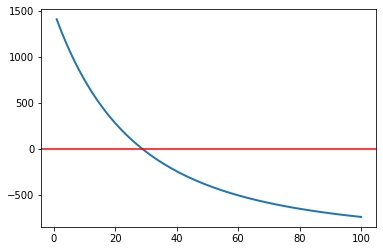

root=28.827559896270014


In [3]:
###############
# root finding 
###############

#1. define the function for which you want to find its root (if the var is number of years 'n', change it so)
def f(i):
    r = -1000 + 100*pa(i,5) + 200*pg(i,5)
    return r 

#2. plot the function widely to locate a suitable bracket (lower/upper limits around the root)
lower_limit = 1
upper_limit = 100

x = np.linspace(lower_limit, upper_limit, 100)
y = f(x) 

plt.plot(x, y, lw=2)
plt.axhline(y=0, c='r')
plt.show()    

#3. Use selected limits to find the root 
from scipy.optimize import root_scalar

lower_limit = 1
upper_limit = 50

sol = root_scalar(f, bracket=[lower_limit, upper_limit], method='brentq') #brentq method takes as input a bracket
print(f'root={sol.root}') 

## Integer Linear Program

In [4]:
#########################
# Integer linear program 
#########################
#%pip install pulp 

import pulp as p 
  
Lp_prob = p.LpProblem('budget_constraint_problem', p.LpMaximize) #create minimization problem  
  
x1 = p.LpVariable('x1', cat='Binary')   
x2 = p.LpVariable('x2', cat='Binary')    
x3 = p.LpVariable('x3', cat='Binary')   
x4 = p.LpVariable('x4', cat='Binary')   
   
Lp_prob += 6646*x1 - 1019*x2 + 984*x3 - 784*x4 #objective function

Lp_prob +=  8000*x1 + 15000*x2 + 8000*x3 + 8000*x4 <= 20000 #add constraint
  
print(Lp_prob) #display formulation  

Lp_prob.solve() #solver 

print('decision vars:' + str([p.value(x1), p.value(x2), p.value(x3), p.value(x4)])) #decision variables 

print('PW_max = ' + str(p.value(Lp_prob.objective))) #optimized objective value

budget_constraint_problem:
MAXIMIZE
6646*x1 + -1019*x2 + 984*x3 + -784*x4 + 0
SUBJECT TO
_C1: 8000 x1 + 15000 x2 + 8000 x3 + 8000 x4 <= 20000

VARIABLES
0 <= x1 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer

decision vars:[1.0, 0.0, 1.0, 0.0]
PW_max = 7630.0


## Spider plot

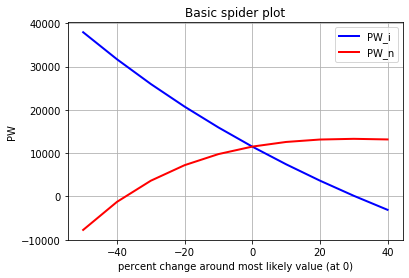

In [5]:
#########################
# Spider plot 
#########################
  
i_most_likely = 15 
n_most_likely = 10

percent_change = np.arange(-50,50,10) #symmetric around 0

i = i_most_likely * (1 + percent_change/100)
n = (n_most_likely * (1 + percent_change/100)).round()

PW_i = -80000 + 25000*pa(i, n_most_likely) - 2000*pg(i, n_most_likely)
PW_n = -80000 + 25000*pa(i_most_likely, n) - 2000*pg(i_most_likely, n)

plt.plot(percent_change, PW_i, c='b', lw=2, label='PW_i') 
plt.plot(percent_change, PW_n, c='r', lw=2, label='PW_n')  
plt.xlabel('percent change around most likely value (at 0)')
plt.ylabel('PW')
plt.title('Basic spider plot')
plt.legend()
plt.grid()
plt.show()

## Simulation (analysis under uncertainty)

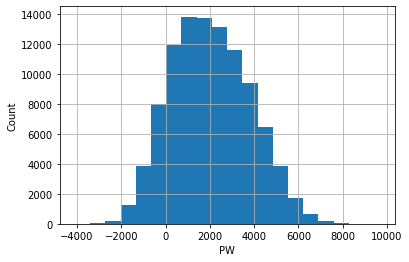

0.87121

In [6]:
#############################
# Simulation (risk analysis)
#############################

n_samples = 100000                                          #number of samples to generate
i = np.random.uniform(low=6, high=10, size=n_samples)       #uniform distribution in [6,10]
NCF = np.random.normal(loc=2000, scale=500, size=n_samples) #normal distribution with mean=2000, std=500

PW = -29000 + 5500*pa(i,6) + NCF*pa(i,4)*pf(i,6) + 3000*pf(i,10)

plt.hist(PW, bins=20, density=False)
plt.xlabel('PW')
plt.ylabel('Count')
plt.grid()
plt.show() 

PW.mean() #mean of PW
PW.std()  #standard deviation of PW

(PW>0).sum()           #number of positive PW values
(PW>0).sum()/n_samples #fraction of positive PW values out of total
